In [74]:
import numpy as np
import csv
import re
from ahrs.ahrs.filters import Mahony

%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from pyquaternion import Quaternion
from scipy.signal import resample


## Ground Truth Robot ARM UR10e

In [77]:
#Data gathering Robot ARM (Ground Truth)
f_GT_name = '/home/kuli/Desktop/WeAreVR/Measurements/robot_position_dev.csv'
with open(f_GT_name, 'r') as file:
    data = file.read()
pattern = r"(-?\d+\.\d+)"
data = re.findall(pattern, data)
GT = np.reshape(data, (-1, 8))
time_columns = [0]
translate_columns = [1,2,3]
quaternion_columns = [4,5,6,7]
time_GT = GT[:, time_columns]
translate_GT = GT[:, translate_columns]
quaternion_GT_pre = GT[:, quaternion_columns]
total_time = float(time_GT[-1]) - float(time_GT[0])
robot_avg_freq = int(np.shape(GT)[0]) / total_time 

print(np.shape(GT))
print(robot_avg_freq)
print("Time:")
print(time_GT)
print("Transtale:")
print(translate_GT)
print("Quaternion:")
print(quaternion_GT_pre)
for q in quaternion_GT_pre:
    print(q)


(11351, 8)
370.5879150864669
Time:
[['1687766361.367926216']
 ['1687766361.367926216']
 ['1687766361.367926216']
 ...
 ['1687766391.997635057']
 ['1687766391.997635057']
 ['1687766391.997635057']]
Transtale:
[['-0.174' '0.865' '0.012']
 ['-0.174' '0.865' '0.012']
 ['-0.174' '0.865' '0.012']
 ...
 ['-0.174' '0.865' '0.012']
 ['-0.174' '0.865' '0.012']
 ['-0.174' '0.865' '0.012']]
Quaternion:
[['-0.000' '-0.000' '0.000' '1.000']
 ['-0.000' '-0.000' '0.000' '1.000']
 ['-0.000' '-0.000' '0.000' '1.000']
 ...
 ['0.000' '-0.000' '0.000' '1.000']
 ['0.000' '-0.000' '0.000' '1.000']
 ['0.000' '-0.000' '0.000' '1.000']]
['-0.000' '-0.000' '0.000' '1.000']
['-0.000' '-0.000' '0.000' '1.000']
['-0.000' '-0.000' '0.000' '1.000']
['-0.000' '-0.000' '0.000' '1.000']
['-0.000' '-0.000' '0.000' '1.000']
['-0.000' '-0.000' '0.000' '1.000']
['-0.000' '-0.000' '0.000' '1.000']
['-0.000' '-0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' 

['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.708' '0.706']
['-0.000' '-0.000' '0.686' '0.728']
['-0.000' '-0.000' '0.686' '0.728']
['-0.000' '-0.000' '0.686' '0.728']
['-0.000' '-0.000' '0.686' '0.728']
['-0.000' '-0.000' '0.686' '0.728']
['-0.000' '-0.000' '0.686' '0.728']
['-0.000' '-0.000' '0.686' '0.728']
['-0.000' '-0.000' '0.686' '0.728']
['-0.000' '-0.000' '0.686' '0.728']
['-0.000' '-0.000' '0.686' '

['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.776' '0.631']
['-0.000' '-0.000' '0.755' '0.655']
['-0.000' '-0.000' '0.755' '0.655']
['-0.000' '-0.000' '0.755' '0.655']
['-0.000' '-0.000' '0.755' '0.655']
['-0.000' '-0.000' '0.755' '0.655']
['-0.000' '-0.000' '0.755' '0.655']
['-0.000' '-0.000' '0.755' '0.655']
['-0.000' '-0.000' '0.755' '0.655']
['-0.000' '-0.000' '0.755' '0.655']
['-0.000' '-0.000' '0.755' '0.655']
['-0.000' '-0.000' '0.755' '0.655']
['-0.000' '-0.000' '0.755' '0.655']
['-0.000' '-0.000' '0.755' '

['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.870' '0.493']
['-0.000' '-0.000' '0.885' '0.466']
['-0.000' '-0.000' '0.885' '0.466']
['-0.000' '-0.000' '0.885' '0.466']
['-0.000' '-0.000' '0.885' '0.466']
['-0.000' '-0.000' '0.885' '0.466']
['-0.000' '-0.000' '0.885' '0.466']
['-0.000' '-0.000' '0.885' '0.466']
['-0.000' '-0.000' '0.885' '0.466']
['-0.000' '-0.000' '0.885' '0.466']
['-0.000' '-0.000' '0.885' '0.466']
['-0.000' '-0.000' '0.885' '0.466']
['-0.000' '-0.000' '0.885' '0.466']
['-0.000' '-0.000' '0.885' '0.466']
['-0.000' '-0.000' '0.885' '

['-0.000' '-0.000' '0.589' '0.808']
['-0.000' '-0.000' '0.589' '0.808']
['-0.000' '-0.000' '0.589' '0.808']
['-0.000' '-0.000' '0.589' '0.808']
['-0.000' '-0.000' '0.589' '0.808']
['-0.000' '-0.000' '0.589' '0.808']
['-0.000' '-0.000' '0.589' '0.808']
['-0.000' '-0.000' '0.589' '0.808']
['-0.000' '-0.000' '0.589' '0.808']
['-0.000' '-0.000' '0.589' '0.808']
['-0.000' '-0.000' '0.589' '0.808']
['-0.000' '-0.000' '0.589' '0.808']
['-0.000' '-0.000' '0.589' '0.808']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.614' '0.789']
['-0.000' '-0.000' '0.639' '

['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0.000' '1.000']
['0.000' '-0.000' '0

In [78]:
#Unifie the axis quaternions_GT (z > y) to (y > -x) quaternions_IMU
rot_WM = Quaternion([0.51, -0.51, 0.51, 0.51])
#Unifie the axis quaternions_GT (z > y) to (x > +-y) quaternions_IMU_NM
rot_NM =Quaternion([0.707, 0.0, 0.707, 0.0])

quaternion_GT_to_NM = np.copy(quaternion_GT_pre)
for index, item in enumerate(quaternion_GT_to_NM):
    #q = rot_WM * Quaternion(item) * rot_WM.inverse
    q = rot_NM * Quaternion(item) * rot_NM.inverse
    quaternion_GT_to_NM[index] = [np.format_float_positional(q[0]), np.format_float_positional(q[1]), np.format_float_positional(q[2]), np.format_float_positional(q[3])]
print(np.shape(quaternion_GT_to_NM))
for q in quaternion_GT_to_NM:
    print(q)

(11351, 4)
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']

['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '0.7310000000000001' '0.']
['0.' '0.6830000000000002' '

['0.' '0.4050000000000001' '0.914' '0.']
['0.' '0.4050000000000001' '0.914' '0.']
['0.' '0.43400000000000005' '0.9010000000000001' '0.']
['0.' '0.43400000000000005' '0.9010000000000001' '0.']
['0.' '0.43400000000000005' '0.9010000000000001' '0.']
['0.' '0.43400000000000005' '0.9010000000000001' '0.']
['0.' '0.43400000000000005' '0.9010000000000001' '0.']
['0.' '0.43400000000000005' '0.9010000000000001' '0.']
['0.' '0.43400000000000005' '0.9010000000000001' '0.']
['0.' '0.43400000000000005' '0.9010000000000001' '0.']
['0.' '0.462' '0.8870000000000001' '0.']
['0.' '0.462' '0.8870000000000001' '0.']
['0.' '0.462' '0.8870000000000001' '0.']
['0.' '0.462' '0.8870000000000001' '0.']
['0.' '0.462' '0.8870000000000001' '0.']
['0.' '0.462' '0.8870000000000001' '0.']
['0.' '0.462' '0.8870000000000001' '0.']
['0.' '0.462' '0.8870000000000001' '0.']
['0.' '0.49' '0.871' '0.']
['0.' '0.49' '0.871' '0.']
['0.' '0.49' '0.871' '0.']
['0.' '0.49' '0.871' '0.']
['0.' '0.49' '0.871' '0.']
['0.' '0.49' '0

['0.' '0.163' '0.987' '0.']
['0.' '0.163' '0.987' '0.']
['0.' '0.163' '0.987' '0.']
['0.' '0.163' '0.987' '0.']
['0.' '0.163' '0.987' '0.']
['0.' '0.13' '0.9910000000000001' '0.']
['0.' '0.13' '0.9910000000000001' '0.']
['0.' '0.13' '0.9910000000000001' '0.']
['0.' '0.13' '0.9910000000000001' '0.']
['0.' '0.13' '0.9910000000000001' '0.']
['0.' '0.13' '0.9910000000000001' '0.']
['0.' '0.13' '0.9910000000000001' '0.']
['0.' '0.13' '0.9910000000000001' '0.']
['0.' '0.09900000000000002' '0.9950000000000001' '0.']
['0.' '0.09900000000000002' '0.9950000000000001' '0.']
['0.' '0.09900000000000002' '0.9950000000000001' '0.']
['0.' '0.09900000000000002' '0.9950000000000001' '0.']
['0.' '0.09900000000000002' '0.9950000000000001' '0.']
['0.' '0.09900000000000002' '0.9950000000000001' '0.']
['0.' '0.09900000000000002' '0.9950000000000001' '0.']
['0.' '0.09900000000000002' '0.9950000000000001' '0.']
['0.' '0.06700000000000002' '0.9980000000000001' '0.']
['0.' '0.06700000000000002' '0.99800000000000

['0.' '0.17000000000000004' '0.9850000000000001' '0.']
['0.' '0.17000000000000004' '0.9850000000000001' '0.']
['0.' '0.17000000000000004' '0.9850000000000001' '0.']
['0.' '0.17000000000000004' '0.9850000000000001' '0.']
['0.' '0.17000000000000004' '0.9850000000000001' '0.']
['0.' '0.17000000000000004' '0.9850000000000001' '0.']
['0.' '0.17000000000000004' '0.9850000000000001' '0.']
['0.' '0.139' '0.9900000000000001' '0.']
['0.' '0.139' '0.9900000000000001' '0.']
['0.' '0.139' '0.9900000000000001' '0.']
['0.' '0.139' '0.9900000000000001' '0.']
['0.' '0.139' '0.9900000000000001' '0.']
['0.' '0.139' '0.9900000000000001' '0.']
['0.' '0.139' '0.9900000000000001' '0.']
['0.' '0.139' '0.9900000000000001' '0.']
['0.' '0.10500000000000001' '0.9940000000000001' '0.']
['0.' '0.10500000000000001' '0.9940000000000001' '0.']
['0.' '0.10500000000000001' '0.9940000000000001' '0.']
['0.' '0.10500000000000001' '0.9940000000000001' '0.']
['0.' '0.10500000000000001' '0.9940000000000001' '0.']
['0.' '0.105

['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.' '0.' '0.']
['0.' '1.'

# IMU FSM-9

In [98]:
#Data gathering
f_name = '/home/kuli/Desktop/WeAreVR/Measurements/imu_position_dev.csv'

with open(f_name , 'r') as f:
    # Use the csv library to read the file and parse it into a list of lists
    csv_reader = csv.reader(f, delimiter=';')
    data = []
    row = next(csv_reader)  # Read the first row
    
    # Skip the sensor data list
    for i in range(0,11):
        row = next(csv_reader)
    
    while row:  # Continue reading until a blank row is encountered
        data.append(row)  # Append the row to the data list
        try:
            row = next(csv_reader)  # Read the next row
        except StopIteration:  # Stop reading if there are no more rows
            break

print(np.shape(data))

#Up sampling Fill the missing frames (kinda fake f = 500Hz)
data2 = []
exp_idx = int(data[0][0])

total_samples = int(total_time * robot_avg_freq)  #time lenght matching
for i, item in enumerate(data):
    while(int(item[0]) >= exp_idx and i < total_samples):
        exp_idx = exp_idx + 1
        data2.append(item)
         
print(np.shape(data2))
print(data[0])


data = data2     
#down-sampling
data = resample(data, num = np.shape(quaternion_GT_to_NM)[0])
print(np.shape(data))

#frequency 
data = np.array(data[2:]).astype(float)
avg_freq = (int(np.shape(data)[0]) / (int(data[-1][0]) - int(data[0][0]))) * 500 #assumed that sensors are in (perfect) 500Hz mode
print(avg_freq)

plt.plot(data[:,0])


acc_columns = [1,2,3]
gyro_columns = [4,5,6]
mag_columns = [7,8,9]
ypr_columns = [10,11,12]
acc_data = data[:, acc_columns]
gyro_data = data[:, gyro_columns]
mag_data = data[:, mag_columns]
#ypr_data = data[:, ypr_columns]
print("Acc:")
print(acc_data)
print("Gyro:")
print(gyro_data) 
print("Mag:")
print(mag_data) 
#print("Yaw Pitch Rol:")
#print(ypr_data)


(15423, 10)
(13935, 10)
['49309', ' -0.2998', ' 0.3223', ' -9.6514', '   0.00', '  -0.00', '  -0.00', '  -0.32', '   0.92', '   0.08 ']
(11351, 10)
401.8767705382436
Acc:
[[-0.32848919  0.27984676 -9.65795837]
 [-0.29442321  0.33052462 -9.67603401]
 [-0.34824858  0.28866266 -9.6271105 ]
 ...
 [-0.2245681   0.299226   -9.53732228]
 [-0.18885393 -0.04699931 -9.60550359]
 [-0.15768415  0.50356659 -9.61045505]]
Gyro:
[[-4.01643916e-04  3.69558247e-04 -1.85386378e-02]
 [ 2.88957390e-04 -1.67708008e-04  1.27877760e-02]
 [-2.28163497e-04  6.68063228e-05 -9.70852977e-03]
 ...
 [-2.02032682e-02  4.10363433e-02 -1.05702093e+00]
 [-1.96836446e-02  3.87929616e-02 -1.02781601e+00]
 [-2.05884826e-02  4.17064187e-02 -1.06379885e+00]]
Mag:
[[-0.33559688  0.92498775  0.06414681]
 [-0.33393928  0.92458747  0.06608415]
 [-0.33726533  0.91947317  0.06992696]
 ...
 [-0.24438226  0.87785442  0.0715013 ]
 [-0.24099165  0.88745269  0.06323057]
 [-0.24364018  0.88183306  0.06698851]]


In [95]:
#Computing quaternion Mahony
quaternions_IMU = Mahony(gyr=gyro_data, acc=acc_data, mag = mag_data, frequency = avg_freq).Q   # Using IMU with sample rate 8ms (default)
quaternions_IMU_NM = Mahony(gyr=gyro_data, acc=acc_data, frequency = avg_freq).Q   # Using IMU with sample rate 8ms (default)
print(np.shape(quaternions_IMU_NM))
for q in quaternions_IMU_NM:
    print(q)

(11349, 4)
[ 1.44875888e-02  9.99750746e-01  2.30006150e-04 -1.69853797e-02]
[ 1.44889086e-02  9.99750676e-01  2.42106084e-04 -1.69881650e-02]
[ 1.44864478e-02  9.99750734e-01  2.32419067e-04 -1.69870202e-02]
[ 1.44949464e-02  9.99750608e-01  2.40384555e-04 -1.69870713e-02]
[ 1.44985927e-02  9.99750619e-01  2.33313809e-04 -1.69833890e-02]
[ 1.44992862e-02  9.99750591e-01  2.39403125e-04 -1.69843814e-02]
[ 1.45013183e-02  9.99750654e-01  2.33881001e-04 -1.69790205e-02]
[ 1.45008159e-02  9.99750520e-01  2.38877499e-04 -1.69872850e-02]
[ 1.45073076e-02  9.99750365e-01  2.34394743e-04 -1.69909103e-02]
[ 1.45146135e-02  9.99750284e-01  2.38304628e-04 -1.69893981e-02]
[ 1.45205018e-02  9.99750291e-01  2.34381986e-04 -1.69839944e-02]
[ 1.45253321e-02  9.99749946e-01  2.38011379e-04 -1.70001330e-02]
[ 1.45329091e-02  9.99749905e-01  2.34577522e-04 -1.69960752e-02]
[ 1.45405092e-02  9.99749878e-01  2.37420573e-04 -1.69911308e-02]
[ 1.45461488e-02  9.99749783e-01  2.34470244e-04 -1.69919400e-02]

[ 1.66177758e-02  9.99709312e-01  1.90512615e-04 -1.74672344e-02]
[ 1.66520285e-02  9.99710335e-01  1.88603475e-04 -1.73758714e-02]
[ 1.66284931e-02  9.99713705e-01  1.87442411e-04 -1.72036568e-02]
[ 1.66111057e-02  9.99715310e-01  1.85647991e-04 -1.71270624e-02]
[ 1.66218453e-02  9.99712779e-01  1.87505674e-04 -1.72637790e-02]
[ 1.66107398e-02  9.99711242e-01  1.88496209e-04 -1.73631781e-02]
[ 1.65848485e-02  9.99713260e-01  1.88689927e-04 -1.72714950e-02]
[ 1.66350666e-02  9.99714680e-01  1.84728037e-04 -1.71405505e-02]
[ 1.66710647e-02  9.99713041e-01  1.84869959e-04 -1.72011042e-02]
[ 1.66172489e-02  9.99711714e-01  1.85652764e-04 -1.73297821e-02]
[ 1.66003489e-02  9.99713172e-01  1.86800447e-04 -1.72617252e-02]
[ 1.66657608e-02  9.99715577e-01  1.80507225e-04 -1.70582965e-02]
[ 1.67227467e-02  9.99715058e-01  1.89283785e-04 -1.70328098e-02]
[ 1.67118580e-02  9.99711901e-01  1.90447085e-04 -1.72276514e-02]
[ 1.66991397e-02  9.99709025e-01  1.98065236e-04 -1.74058965e-02]
[ 1.673660

[-0.01282876  0.21935081 -0.9754844  -0.01228089]
[-0.01283721  0.21809956 -0.9757649  -0.01227387]
[-0.01288154  0.21685905 -0.97604139 -0.01222376]
[-0.01292822  0.21560499 -0.97631891 -0.01219562]
[-0.01296268  0.21433934 -0.9765975  -0.01216273]
[-0.0129945   0.2130704  -0.97687545 -0.01210413]
[-0.01303109  0.21177893 -0.9771554  -0.01213284]
[-0.01307057  0.21051834 -0.97742765 -0.01209907]
[-0.01310488  0.20924264 -0.9777012  -0.01208884]
[-0.01312437  0.20798145 -0.97797063 -0.01203829]
[-0.01316877  0.20670961 -0.97823996 -0.01201252]
[-0.01317142  0.20542058 -0.97851119 -0.01203147]
[-0.01321829  0.20416855 -0.97877283 -0.01200963]
[-0.01323623  0.20291622 -0.97903283 -0.01202199]
[-0.01326298  0.20167748 -0.97928901 -0.01197197]
[-0.01329621  0.20042017 -0.97954718 -0.01192857]
[-0.01334287  0.19915388 -0.97980529 -0.01188707]
[-0.01338927  0.19788058 -0.98006315 -0.01184156]
[-0.01342349  0.19659637 -0.98032084 -0.01186255]
[-0.0134479   0.195326   -0.98057464 -0.01184435]


[-0.01720614 -0.99919542  0.03160538  0.01770757]
[-0.01719469 -0.9991534   0.03290341  0.01772538]
[-0.01715553 -0.99911042  0.03420858  0.0177154 ]
[-0.01719556 -0.99906366  0.03551027  0.01775235]
[-0.01714217 -0.99901861  0.03678111  0.01775162]
[-0.01711629 -0.99897162  0.03804988  0.0177464 ]
[-0.01707677 -0.99892289  0.03932962  0.01773782]
[-0.01702935 -0.99887188  0.04062656  0.01773277]
[-0.01703317 -0.99881727  0.04193518  0.01775857]
[-0.01697399 -0.99876284  0.04323113  0.01776936]
[-0.01692703 -0.99870658  0.04453466  0.01775672]
[-0.01692564 -0.99864682  0.0458512   0.01776825]
[-0.01686566 -0.99858705  0.04715907  0.01776163]
[-0.01687359 -0.99852339  0.04847503  0.01779027]
[-0.01680616 -0.99846121  0.04976679  0.01777753]
[-0.0168566  -0.9983939   0.05107294  0.01780509]
[-0.01678974 -0.99832915  0.05234551  0.01780322]
[-0.01676359 -0.9982617   0.05362018  0.0178167 ]
[-0.01673069 -0.9981925   0.05490054  0.01782528]
[-0.01668136 -0.99812159  0.05619211  0.01781746]


[0.01892005 0.06190012 0.99789801 0.00315821]
[0.01894667 0.06320588 0.99781564 0.00315906]
[0.01897108 0.06450604 0.99773201 0.00314705]
[0.01899734 0.06580198 0.99764697 0.00311783]
[0.01901427 0.06710275 0.99755998 0.00312612]
[0.01904336 0.06836975 0.99747345 0.00310422]
[0.01905377 0.06964019 0.9973855  0.00305942]
[0.01907456 0.07093296 0.9972941  0.0030262 ]
[0.01909458 0.07222732 0.99720099 0.00296616]
[0.01912928 0.07354479 0.99710393 0.00299837]
[0.01913739 0.07483438 0.99700794 0.00295649]
[0.01915541 0.07613077 0.99690948 0.00294337]
[0.01915764 0.07742738 0.99680968 0.00290515]
[0.01916297 0.07872474 0.99670799 0.00289308]
[0.01917993 0.08001956 0.9966046  0.00287601]
[0.01920664 0.08130721 0.99649994 0.00284831]
[0.01921787 0.08259766 0.99639353 0.00287021]
[0.01923626 0.08385618 0.99628811 0.00284602]
[0.01924746 0.08511752 0.99618109 0.00278964]
[0.01926928 0.08639394 0.99607089 0.00275125]
[0.01926397 0.08767651 0.99595909 0.00268644]
[0.01928407 0.08898468 0.99584263 

[ 0.014869    0.99951926 -0.02299438 -0.01454009]
[ 0.0148443   0.99951452 -0.0232253  -0.01452438]
[ 0.01481864  0.99950995 -0.02344577 -0.01451095]
[ 0.01480073  0.99950481 -0.02367431 -0.01451215]
[ 0.01478142  0.99950013 -0.02388551 -0.01450793]
[ 0.01476891  0.99949602 -0.02406809 -0.01450182]
[ 0.01475115  0.99949185 -0.02425595 -0.01449442]
[ 0.01473836  0.99948762 -0.02444103 -0.01448858]
[ 0.01472081  0.99948339 -0.02462799 -0.01448123]
[ 0.01470807  0.99947908 -0.02481348 -0.01447546]
[ 0.01469045  0.99947479 -0.02500028 -0.01446813]
[ 0.01467811  0.99947039 -0.0251857  -0.01446256]
[ 0.01465973  0.99946604 -0.02537303 -0.01445495]
[ 0.01465118  0.99946158 -0.02555514 -0.01445089]
[ 0.01464433  0.99945738 -0.02572747 -0.01444266]
[ 0.01463564  0.99945316 -0.02590286 -0.01443007]
[ 0.01462494  0.99944927 -0.02606444 -0.014419  ]
[ 0.01462167  0.99944491 -0.02622716 -0.01442964]
[ 0.0146085   0.99944105 -0.02638301 -0.01442594]
[ 0.01459827  0.9994375  -0.02653022 -0.01441265]


[ 0.00780106 -0.0183078   0.99980024  0.00185528]
[ 0.00780602 -0.01957883  0.99977605  0.00189368]
[ 0.00781267 -0.02087319  0.99974973  0.00193823]
[ 0.00780598 -0.02218542  0.99972151  0.00194196]
[ 0.00777925 -0.0234999   0.99969169  0.00194192]
[ 0.00776662 -0.02480248  0.99966028  0.00196188]
[ 0.00774579 -0.02611311  0.99962703  0.00197856]
[ 0.00774538 -0.02742751  0.99959183  0.00197782]
[ 0.00773248 -0.02873292  0.99955522  0.00199686]
[ 0.00772674 -0.03004612  0.99951665  0.00200056]
[ 0.00771052 -0.03136836  0.99947623  0.00196076]
[ 0.00769378 -0.03266828  0.99943465  0.00199287]
[ 0.00768325 -0.03396629  0.99939152  0.00196187]
[ 0.00768257 -0.03524194  0.99934729  0.00199355]
[ 0.00769032 -0.03652844  0.99930092  0.00205041]
[ 0.00769404 -0.03783493  0.99925224  0.00207016]
[ 0.00766163 -0.03914454  0.99920206  0.00206297]
[ 0.00765576 -0.04045896  0.99914971  0.00207745]
[ 0.00764867 -0.04176143  0.99909615  0.00208773]
[ 0.00763909 -0.043069    0.99904073  0.00207976]


[-0.01292943 -0.99930133  0.03303744  0.01175647]
[-0.01290963 -0.99934389  0.03174268  0.01172787]
[-0.01294435 -0.99938347  0.03045733  0.01172524]
[-0.01299481 -0.99942127  0.02916594  0.01173043]
[-0.01299151 -0.99945895  0.02785594  0.01170798]
[-0.01303212 -0.99949381  0.02655304  0.01171449]
[-0.01302129 -0.99952825  0.02523527  0.01170098]
[-0.01304555 -0.99956018  0.02392725  0.01169373]
[-0.01305351 -0.99959062  0.02261958  0.01168535]
[-0.01307907 -0.99961915  0.02131506  0.01166874]
[-0.01307376 -0.99964654  0.01999928  0.01165743]
[-0.01307798 -0.99967203  0.01868872  0.01164153]
[-0.0131171  -0.99969479  0.017394    0.0116497 ]
[-0.01308412 -0.9997171   0.01610195  0.01163008]
[-0.01312376 -0.99973636  0.01482248  0.01163097]
[-0.01317879 -0.99975388  0.01353183  0.01163563]
[-0.01317958 -0.99977095  0.01222516  0.0116141 ]
[-0.01322398 -0.99978548  0.01091896  0.01161486]
[-0.01322535 -0.99979906  0.00960995  0.01160103]
[-0.01324845 -0.99981049  0.00831201  0.01159222]


[-0.01230911  0.15100965 -0.98845081 -0.00309199]
[-0.01228619  0.152314   -0.98825089 -0.00310999]
[-0.01228043  0.1536158  -0.98804944 -0.0031124 ]
[-0.01226918  0.15490118 -0.98784883 -0.00312603]
[-0.01226542  0.15617939 -0.98764765 -0.00311133]
[-0.01225806  0.15744874 -0.98744609 -0.00313796]
[-0.01224349  0.15871342 -0.98724363 -0.00318769]
[-0.01224227  0.15999653 -0.9870364  -0.00322083]
[-0.0122206   0.1612919  -0.98682569 -0.00326277]
[-0.01219374  0.16259708 -0.98661185 -0.00324893]
[-0.01217831  0.16387473 -0.98640046 -0.00330042]
[-0.01217078  0.16516602 -0.98618515 -0.00330198]
[-0.01217426  0.1664518  -0.98596884 -0.00332054]
[-0.01216724  0.16775002 -0.98574875 -0.00336037]
[-0.01216204  0.16904902 -0.98552699 -0.00332798]
[-0.0121428   0.17032802 -0.9853069  -0.00335013]
[-0.01213095  0.17161318 -0.98508405 -0.00334311]
[-0.01210346  0.17287957 -0.98486292 -0.00334392]
[-0.0120683   0.17414897 -0.98463951 -0.00339509]
[-0.01203627  0.17545085 -0.98440881 -0.00337932]


In [91]:
#num_samples = np.shape(gyro_data)[0]
#orientation = Mahony()
#quaternions = np.tile(quaternions_IMU[0], (num_samples, 1)) # Allocate for quaternions
#for t in range(1, num_samples):
#    quaternions[t] = orientation.updateMARG(quaternions[t-1], gyr=gyro_data[t], acc=acc_data[t], mag=mag_data[t], dt = 1./125. )
#print(quaternions)

In [92]:
def get_arrow(num, orientation):
    pitch = np.radians(orientation[num, 1])
    yaw = np.radians(orientation[num, 2])
    u = np.sin(yaw)*np.cos(pitch)
    v = np.cos(yaw)*np.cos(pitch)
    w = np.sin(pitch)
    return 0,0,0,u,v,w

def get_arrow_q(num, quaternions, InitialPerspectiveVector):
    u, v, w = Quaternion(quaternions[num]).rotate(InitialPerspectiveVector)
    return 0,0,0,u,v,w

def get_arrow_unwinded(num, quaternions, Vector):
    u_u, v_u, w_u = Quaternion(quaternions[num]).inverse.rotate(Vector)
    return 0,0,0,u_u,v_u,w_u


In [ ]:
#Vector from sensor
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

orientation = ypr_data

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
    
def update1(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1)
    Qui = ax.quiver(*get_arrow(num, orientation), length=1, normalize=True)

Qui = ax.quiver(*get_arrow(0, orientation), length=1, normalize=True)  
ani = FuncAnimation(fig, update1, fargs=(Qui, Qui), frames=range(0, np.shape(orientation)[0]), interval=1, blit=True, repeat = False)
plt.show()

In [ ]:
#Quaternion from IMU (Mahony)
%matplotlib notebook
%matplotlib notebook

quaternions = quaternions_IMU_NM
WantToClear = 1
InitialPerspectiveVector = [1.0, 0.0, 0.0]
x0, y0, z0, u0, v0, w0 = get_arrow_q(0, quaternions, InitialPerspectiveVector)
#
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')

def update2(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        x, y, z, u, v, w = get_arrow_q(num, quaternions, InitialPerspectiveVector)
    Qui = ax.quiver([x,x0], [y,y0], [z,z0], [u,u0], [v,v0], [w,w0], length=1, normalize=True, color = ['blue', 'green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['green', 'green'])  
ani = FuncAnimation(fig, update2, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=0.1, blit=True, repeat = False)
plt.show()

In [ ]:
#Comparing Ground-Truth and IMU (Mahony)
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

#orientation = ypr_data
GT_q = quaternion_GT
IMU_q = quaternions_IMU_NM

InitialPerspectiveVector = [1,0,0]
x0, y0, z0, u0, v0, w0 = get_arrow_q(0, GT_q, InitialPerspectiveVector)

#
fig, ax = plt.subplots(subplot_kw = dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color = '#aaaaaa',linestyle = 'dashed')
ax.quiver(0, -1, 0, 0, 3, 0, color = '#aaaaaa',linestyle = 'dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color = '#aaaaaa',linestyle = 'dashed')
    
    
def update3(num, Q, X):
    if (WantToClear):
        ax.clear()
        ax.quiver(-1, 0, 0, 3, 0, 0, color = '#aaaaaa',linestyle = 'dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color = '#aaaaaa',linestyle = 'dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color = '#aaaaaa',linestyle = 'dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        #x, y, z, u, v, w = get_arrow(num, orientation)
        x, y, z, u, v, w = get_arrow_q(num, GT_q, InitialPerspectiveVector)
        x_q, y_q, z_q, u_q, v_q, w_q = get_arrow_q(num, IMU_q, InitialPerspectiveVector)
    Qui = ax.quiver([x,x_q,x0], [y,y_q,y0], [z, z_q,z0], [u, u_q,u0], [v,v_q,v0], [w,w_q,w0], length=1, normalize=True, color = ['blue','red','green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['green','green'])  
ani = FuncAnimation(fig, update3, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=2, blit=True, repeat = False)
plt.show()


<IPython.core.display.Javascript object>


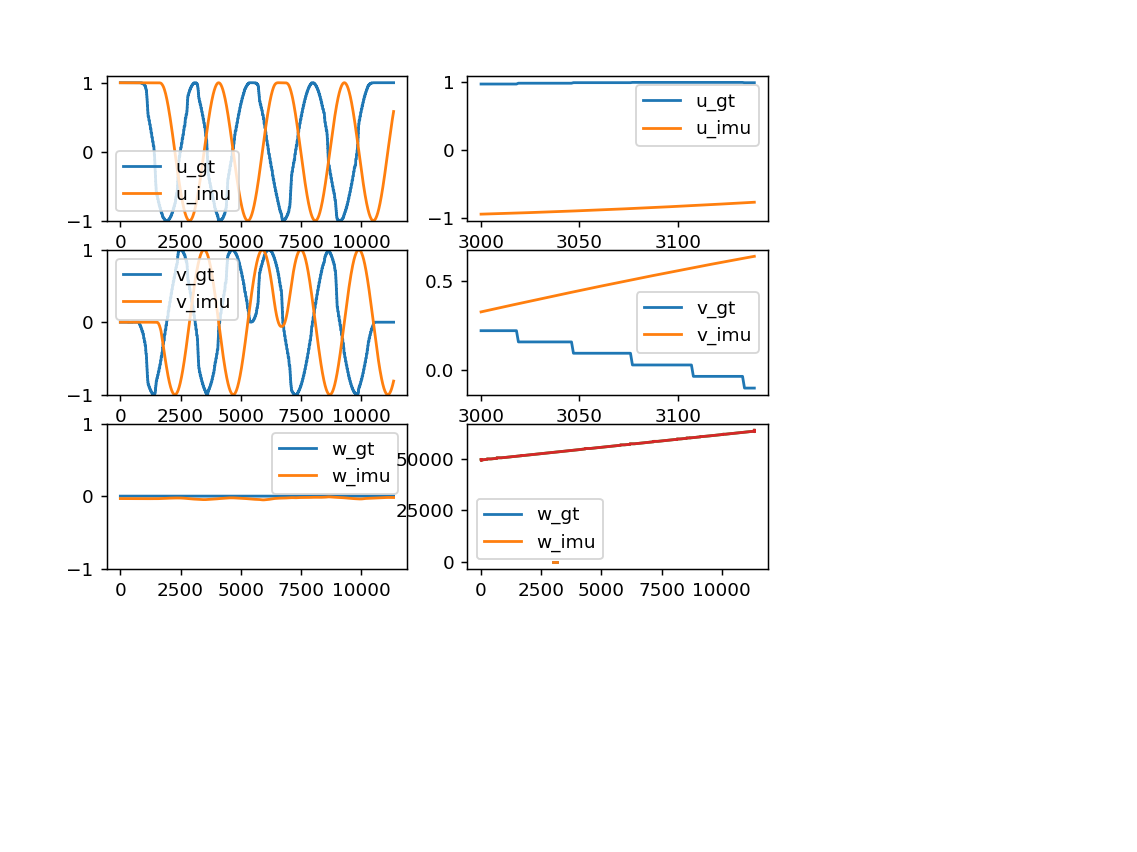

In [96]:
#Comparing Ground-Truth and IMU (Mahony) - plot
%matplotlib notebook
%matplotlib notebook

GT_q =  quaternion_GT_to_NM #quaternion_GT_pre 
IMU_q = quaternions_IMU_NM

InitialPerspectiveVector = [1.0, 0.0, 0.0] 
x0, y0, z0, u0, v0, w0 = get_arrow_q(0, GT_q, InitialPerspectiveVector)

full_frames = np.minimum(np.shape(GT_q)[0],np.shape(IMU_q)[0])
zoom_frames = (3000, 3140)

data = np.zeros((full_frames, 6))

for i in range(0, full_frames):
    x, y, z, u, v, w = get_arrow_q(i, GT_q, InitialPerspectiveVector)
    x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow_q(i, IMU_q, InitialPerspectiveVector)
    
    ##test
    #x, y, z, u, v, w = get_arrow_q(i, quaternions_IMU_pre, InitialPerspectiveVector_IMU)
    #x, y, z, u, v, w =  get_arrow_q(i, quaternions_IMU_pre_NM, InitialPerspectiveVector_IMU)
    
    #x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow_q(i, quaternions_IMU_pre_NM, InitialPerspectiveVector_IMU)
    #x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow_q(i, quaternions_IMU_pre, InitialPerspectiveVector_IMU)
    #x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow(i, ypr_data)
    ## end test
    
    data[i] = (u, v, w, u_imu, v_imu, w_imu)

fig = plt.figure()
ax = plt.subplot(321)
ax.set_ylim(-1, 1.1)
ax.plot(range(0, full_frames), data[:,[0,3]])
ax.legend(['u_gt', 'u_imu'])
ax = plt.subplot(323)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[1,4]])
ax.legend(['v_gt', 'v_imu'])
ax = plt.subplot(325)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[2,5]])
ax.legend(['w_gt', 'w_imu'])

ax = plt.subplot(322)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[0,3]])
ax.legend(['u_gt', 'u_imu'])
ax = plt.subplot(324)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[1,4]])
ax.legend(['v_gt', 'v_imu'])
ax = plt.subplot(326)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[2,5]])
ax.legend(['w_gt', 'w_imu'])

fig.show()

# Unwinding: TODO

In [ ]:
#Unwinding the Ground-Truth by the reverse of quaternion from IMU (Mahony)
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

orientation = ypr_data

x0, y0, z0, u0, v0, w0 = get_arrow(0, orientation)
InitialPerspectiveVector = [1,0,0]

#
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')

    
def update4(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        x, y, z, u, v, w = get_arrow(num, orientation)
        x_u, y_u, z_u, u_u, v_u, w_u = get_arrow_unwinded(num, quaternions, [u, v, w])
    Qui = ax.quiver([x,x_u,x0], [y,y_u,y0], [z, z_u,z0], [u, u_u,u0], [v,v_u,v0], [w,w_u,w0], length=1, normalize=True, color = ['red','blue', 'green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['red','green'])  
ani = FuncAnimation(fig, update4, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=2, blit=True, repeat = False)
plt.show()



In [ ]:
#Unwinding the Ground-Truth by the reverse of quaternion from IMU (Mahony) - plot
InitialPerspectiveVector = [1,0,0]

full_frames = np.shape(quaternions)[0] 
zoom_frames = (500, 640)

data = np.zeros((full_frames, 6))
for i in range(0, full_frames):
    x, y, z, u, v, w = get_arrow(i, orientation)
    x_u, y_u, z_u, u_u, v_u, w_u = get_arrow_unwinded(i, quaternions, [u, v, w])
    data[i] = (u, v, w, u_u, v_u, w_u)

fig = plt.figure()
ax = plt.subplot(321)
ax.set_ylim(-1, 1.2)
ax.plot(range(0, full_frames), data[:,[0,3]])
ax.legend(['u_df', 'u_u'])
ax = plt.subplot(323)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[1,4]])
ax.legend(['v_df', 'v_u'])
ax = plt.subplot(325)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[2,5]])
ax.legend(['w_df', 'w_u'])

ax = plt.subplot(322)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[0,3]])
ax.legend(['u_df', 'u_u'])
ax = plt.subplot(324)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[1,4]])
ax.legend(['v_df', 'v_u'])
ax = plt.subplot(326)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[2,5]])
ax.legend(['w_df', 'w_u'])

fig.show()

In [ ]:
#playground

# Notes for myself
### Start the measurement of FSM-9 Sensor
- edit src code (e.g. off the energy-safe mode)
- cmake genarate with cmake-gui (on the python2.7 env)
- make the generated files (on the python2.7 env {should work on base env)
- run the .bin file with 'sudo' (!):
- sudo /home/kuli/Desktop/WeAreVR/fsm9/build/libfree-examples/game3d_example > ~/Desktop/imu_position_test.csv
(unplug and plug is the best debug)

## UniversalRobot struggles (ur10e)
- Ros2 (galactic)
- UrDriver (for galactic)
- Ros Controller
- setup LAN (192.168.20.36 /255.255.252.0 )


### Start the measurement of robot position
- source /opt/ros/galactic/setup.bash
- ros2 launch ur_bringup ur_control.launch.py ur_type:=ur10e robot_ip:=192.168.20.35 launch_rviz:=true tool_tcp_port:=50002 
<br> or <br> 
- ros2 launch ur_bringup ur_control.launch.py ur_type:=ur10e robot_ip:=192.168.20.35 launch_rviz:=false tool_tcp_port:=50002 
- *put play on the teach panel, wait for command request (if you want to controll remotely)
- ros2 launch ur_bringup test_scaled_joint_trajectory_controller.launch.py
- *ros2 topic echo /joint_states --field position --csv > ~/Desktop/test.csv
Better (absolute angle) 500Hz:
- ros2 run tf2_ros tf2_echo base_link wrist_3_link 500 > ~/Desktop/robot_position_test.csv 


### test
sudo /home/kuli/Desktop/WeAreVR/fsm9/build_dev/game3d_example
ros2 run tf2_ros tf2_echo base_link wrist_3_link 125
###
sudo /home/kuli/Desktop/WeAreVR/fsm9/build_dev/game3d_example > ~/Desktop/WeAreVR/Measurements/imu_position_dev.csv & ros2 run tf2_ros tf2_echo base_link wrist_3_link 400  > ~/Desktop/WeAreVR/Measurements/robot_position_dev.csv


sudo /home/kuli/Desktop/WeAreVR/fsm9/build_dev/game3d_example & ros2 run tf2_ros tf2_echo base_link wrist_3_link 500
sudo kill -SIGINT nr

# TODO
###### Frequency:
- ADD timestamp on the IMU (ros time)
- robot f = 370(?) + scaled_joint_trajectory_controller]: Controller state will be published at 100.00 Hz -> makes the stairs effect (/opt/ros/galactic/share/ur_bringup/launch/ur_launch.launch.py ?)
- IMU f = 480-500Hz -> receiving(real) 380-408Hz (the longer the better)
- improve measurment of frequency (cut the extra asumption that it's perfect 500Hz) 
###
- parallel start could be better
- re-do the unviding visualisation
- camera to unity
- data to Unity tcp connector (?)
- VR in Unity
### Jupyter Notebook struggles
- install lib's using: <br>
import sys <br>
!{sys.executable} -m pip install libx <br>

In [ ]:
import sys
!{sys.executable} -m pip install SciPy